## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import DBSCAN
from sklearn.cluster import DBSCAN
from itertools import product

In [2]:
#import normalized data
customers_normal = pd.read_csv('data_imgs/customers_normal.csv')
customers_normal.head()

,income,age,gender,marital_status,doctorate,city_pop
0,0.107091,0.120215,-1.125463,0.086460,-0.178303,-0.657055
1,-0.775606,1.468102,-1.125463,0.086460,-0.178303,1.050840
2,-0.236233,-0.311109,0.888523,-1.035942,-0.178303,1.050840
3,1.078893,0.551539,0.888523,-1.035942,-0.178303,1.050840
4,0.938258,0.821116,0.888523,2.331263,-0.178303,2.007311


### Visualizing data

Text(0, 0.5, 'Income')

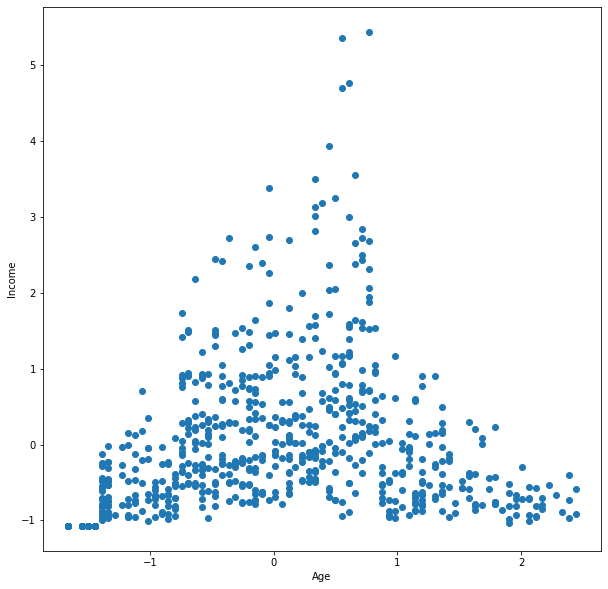

In [3]:
#sample plot
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(customers_normal.age, customers_normal.income)
ax.set_xlabel('Age')
ax.set_ylabel('Income')

## Sample

In [4]:
test = np.asarray(customers_normal.loc[:,['income', 'age']])
test

array([[ 0.10709118,  0.12021489],
       [-0.77560585,  1.4681017 ],
       [-0.23623257, -0.31110889],
       ...,
       [ 1.69454581,  0.33587678],
       [-0.39195216, -0.36502436],
       [-0.2666268 , -1.38941833]])

In [152]:
#custom function for creating graphs of different combinations
def DBSCAN_test(data, combination, graph_number):
    """Number of figs (figsize length * figsize width) must equal combos length for proper mapping
    figsize should be a list with two elements
    data and combos should be nparrays
    
    df = np.array([1, 2, 3, 4], [3, 4, 5, 6])
    combination = np.array([0.1, 0.1], [0.1, 1], [0.1, 20], [5, 0.1], [5, 1], [5, 20])
    dimension = math.sqrt(len(combination))
    ex: DBSCAN_test(df, combination, [dimension, dimension])
            --> output: supblot visual of input shape with DBSCAN outcomes plotted 
            for each combination
    """
    
    fig, axes = plt.subplots(graph_number[0], graph_number[1], figsize=(12, 12))
    fig.tight_layout()

    # Plot the data using one of Matplotlib's plotting functions
    for i in range(len(combination)):
        db = DBSCAN(eps=combination[i][0],
                    min_samples=combination[i][1],
                    metric='euclidean')
        
        data_db = db.fit_predict(data)

        # Plot the data using one of Matplotlib's plotting functions
         #create empty centroid lists
        X_centroids = []
        Y_centroids = []
    
        #append each new cluster mean for each iteration
        for cluster in set(data_db):
            x = data[data_db == cluster,0]
            y = data[data_db == cluster,1]
            X_centroids.append(np.mean(x))
            Y_centroids.append(np.mean(y))
        
            #visualize    
            axes.flat[i].scatter(x, y, s=50, marker='s', label=f"cluster {cluster}")
            axes.flat[i].set_title(combos[i])

In [153]:
#defining parameters
eps = [0.2, 0.3]
min_samples = [5, 7, 10, 12]
#making combinations
combos = list(product(eps, min_samples))
len(combos) #in this case it's 8

8

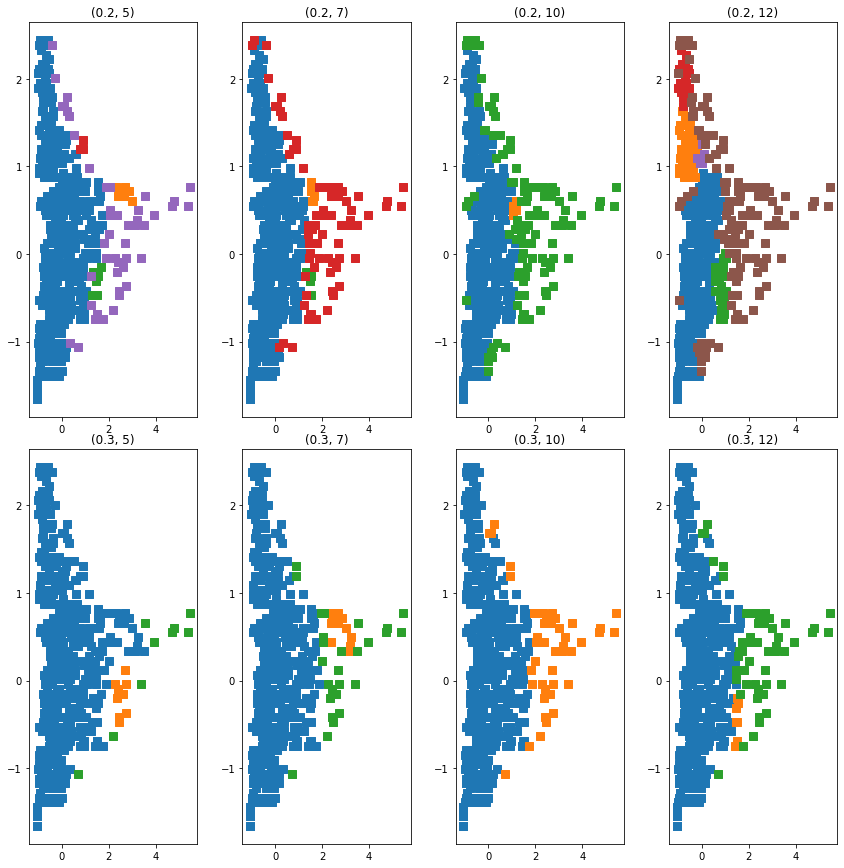

In [7]:
DBSCAN_test(test, combos, [2, 4]) 

## Whole set

In [40]:
#now lets try DBSCAN
db = DBSCAN(eps=0.3,
            min_samples=10,
            metric='euclidean')

y_db = db.fit_predict(customers_normal.values)
#length of db should correspond with customer row #
len(y_db), customers_normal.shape

(714, (714, 6))

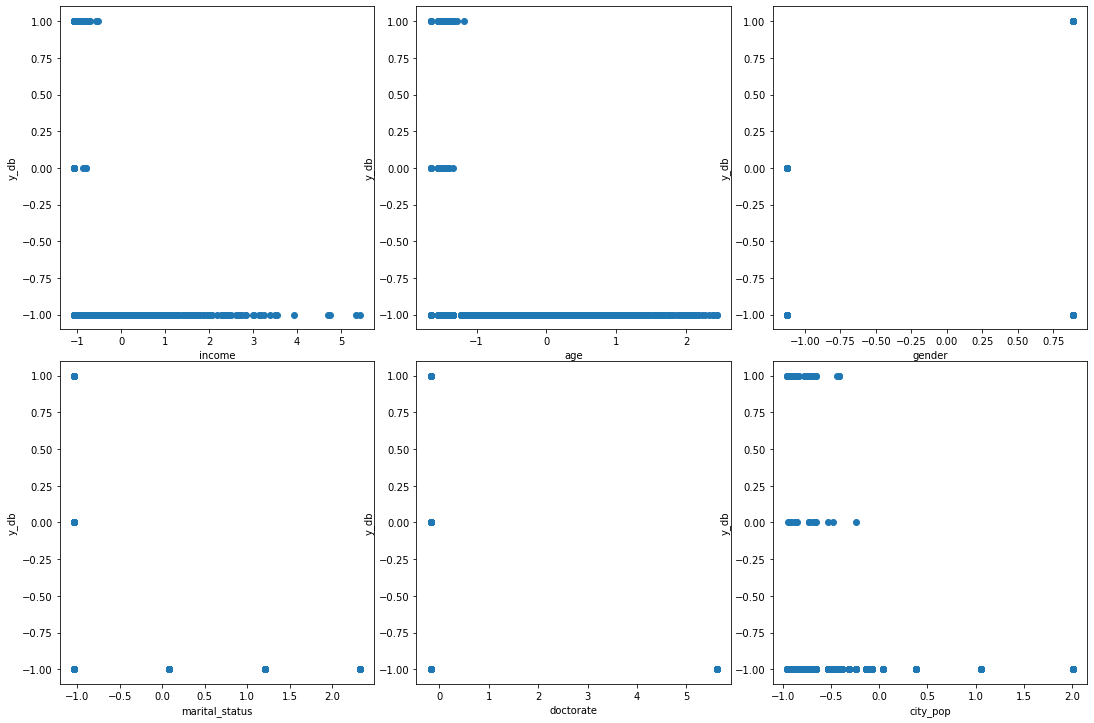

In [35]:
#sample plot
fig, axes = plt.subplots(2, 3, figsize=(15,10))
fig.tight_layout()

for i, ax in enumerate(axes.flat):
    ax.scatter(customers_normal.iloc[:,i], y_db)
    ax.set_xlabel(customers_normal.columns[i])
    ax.set_ylabel('y_db')

In [10]:
#import needed libraries
from sklearn.cluster import AgglomerativeClustering

#cluster hierarchy
import scipy.cluster.hierarchy as sch

In [15]:
#let's plot the dendrogram
def plot_dendrogram(X, method='ward'):
   #let's plot the data we just generated
    fig, ax = plt.subplots(figsize=(12,8))

    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

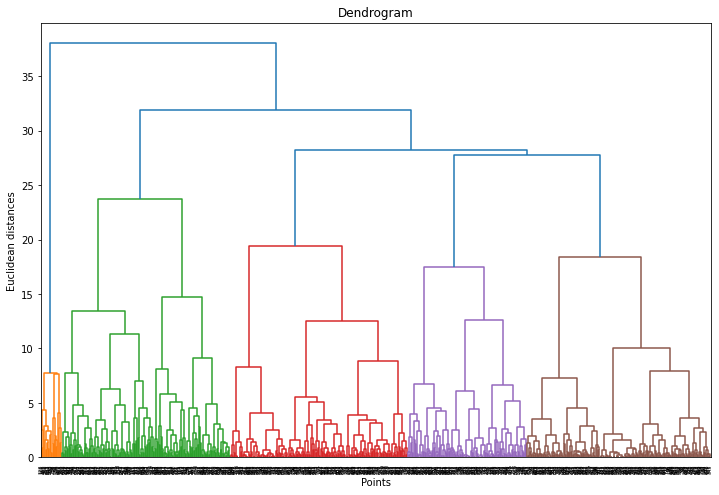

In [12]:
#run function
plot_dendrogram(customers_normal.values)

In [13]:
#create an agglomerative object defining linkage
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters=5)
#fit and predict
y_hc = ac.fit_predict(customers_normal.values)

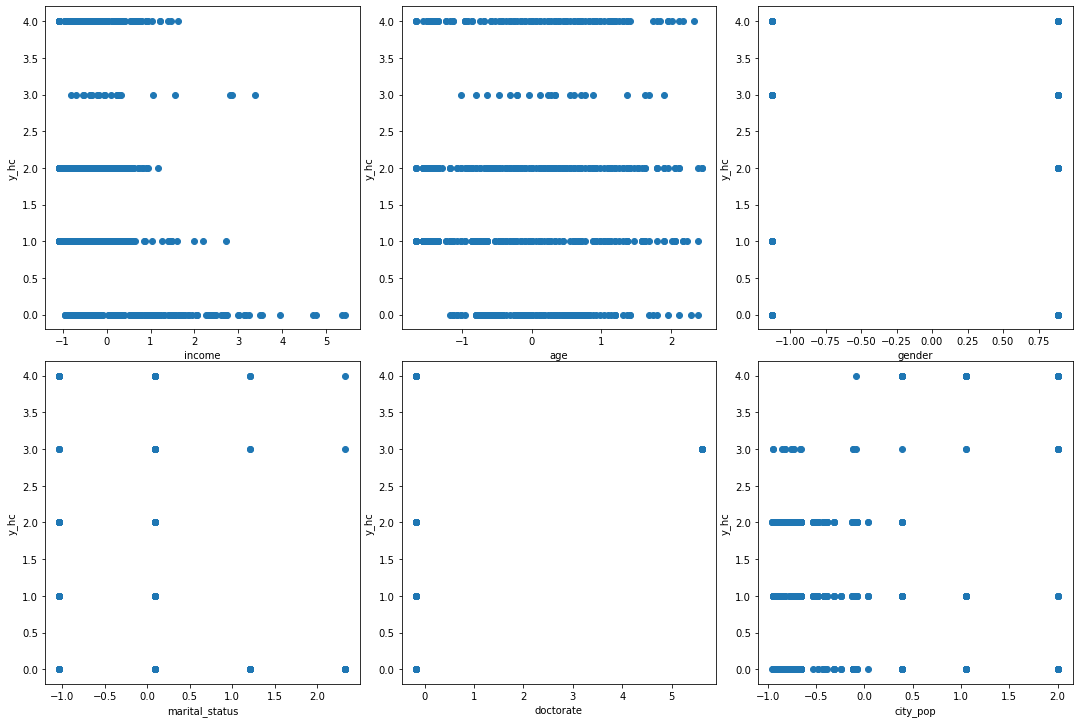

In [32]:
#sample plot
fig, axes = plt.subplots(2, 3, figsize=(15,10))
fig.tight_layout()

for i, ax in enumerate(axes.flat):
    ax.scatter(customers_normal.iloc[:,i], y_hc)
    ax.set_xlabel(customers_normal.columns[i])
    ax.set_ylabel('y_hc')

## Radar Charts

Clusters are colored, inputted based on percentage of total data points they capture

In [64]:
#concatinate clustering and data
db_data = pd.concat([customers_normal,pd.DataFrame(y_db)], axis=1)
db_data  = dbscan_data .rename(columns= {0: 'cluster'})

db_data.value_counts('cluster')

cluster
-1    663
 1     32
 0     19
dtype: int64

In [83]:
db_clustered = db_data.groupby('cluster').mean()
db_clustered

,income,age,gender,marital_status,doctorate,city_pop
cluster,,,,,,
-1,0.076634,0.113465,-0.010632,0.079688,0.013716,0.059680
0,-1.035113,-1.511438,-1.125463,-1.035942,-0.178303,-0.746789
1,-0.973171,-1.453443,0.888523,-1.035942,-0.178303,-0.793088


In [117]:
db_clustered.columns

Index(['income', 'age', 'gender', 'marital_status', 'doctorate', 'city_pop'], dtype='object')

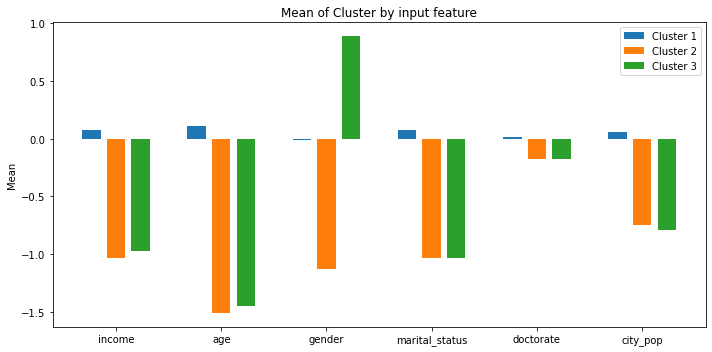

In [143]:
x = np.arange(len(db_clustered.columns))
width = 0.35
labels = list(db_clustered.columns)

#sample plot
fig, ax = plt.subplots(figsize=(10,5))

rects1 = ax.bar(x - 2*(width/3), db_clustered.loc[-1].values, width/2, label='Cluster 1')
rects2 = ax.bar(x, db_clustered.loc[0].values, width/2, label='Cluster 2')
rects3 = ax.bar(x + 2*(width/3), db_clustered.loc[1].values, width/2, label='Cluster 3')

ax.set_ylabel('Mean')
ax.set_title('Mean of Cluster by input feature')
ax.set_xticks(x)
ax.set_xticklabels( (db_clustered.columns) )


ax.legend()
fig.tight_layout()

In [150]:
hc_data = pd.concat([customers_normal,pd.DataFrame(y_hc)], axis=1)
hc_data  = hc_data.rename(columns= {0: 'cluster'})

hc_clustered = hc_data.groupby('cluster').mean()
hc_clustered.head()

,income,age,gender,marital_status,doctorate,city_pop
cluster,,,,,,
0,0.825770,0.141482,0.105306,1.158977,-0.178303,-0.035662
1,-0.307744,-0.186447,-1.125463,-0.448017,-0.178303,-0.356501
2,-0.425487,-0.036305,0.888523,-0.446109,-0.178303,-0.609943
3,0.407802,0.350581,-0.026925,0.086460,5.608435,0.284469
4,-0.126386,0.072243,0.159048,-0.302404,-0.178303,1.473137


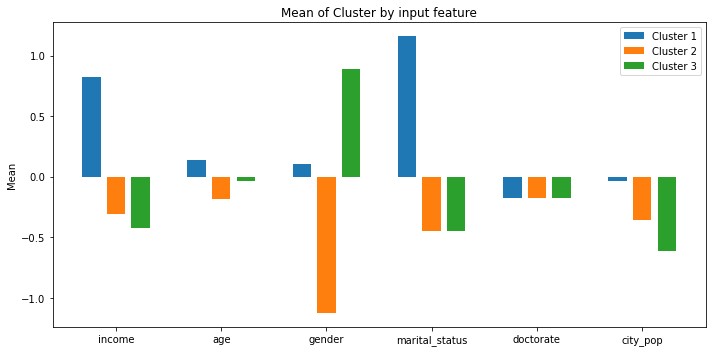

In [151]:
x = np.arange(len(hc_clustered.columns))
width = 0.35
labels = list(hc_clustered.columns)

#sample plot
fig, ax = plt.subplots(figsize=(10,5))

rects1 = ax.bar(x - 2*(width/3), hc_clustered.loc[0].values, width/2, label='Cluster 1')
rects2 = ax.bar(x, hc_clustered.loc[1].values, width/2, label='Cluster 2')
rects3 = ax.bar(x + 2*(width/3), hc_clustered.loc[2].values, width/2, label='Cluster 3')

ax.set_ylabel('Mean')
ax.set_title('Mean of Cluster by input feature')
ax.set_xticks(x)
ax.set_xticklabels( (hc_clustered.columns) )


ax.legend()
fig.tight_layout()